In [1]:
import pandas as pd


%matplotlib inline

In [68]:
preds = []
for f in range(5):
    df = pd.read_csv('../experiments/v6/pred-%d.csv'%f, sep='\t')
    preds.append(df)
df = pd.concat(preds)

In [69]:
df.head()

,Unnamed: 0,textID,text,selected_text,sentiment,kfold,old_sentiment,aux_id,c_selected_text,senti_label,first_char,words,invert_map,word_invert_map,pred,score
0,0,f7fdea625a,i`m so bored i can barely even tweet. i have n...,bored,negative,0,sadness,f7fdea625a,bored,0,"[True, False, False, True, True, True, True, T...","['i', '`', 'm', 'so', 'bored', 'i', 'can', 'ba...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 4, 7, 13, 15, 19, 26, 31, 36, 38, 40...",i`m so bored,1.161503
1,1,c19de2c75b,awwwwwwwwww thats jus...awwwww.did she get to ...,awwwwwwwwww thats jus...awwwww.did she get to ...,neutral,0,surprise,c19de2c75b,awwwwwwwwww thats jus...awwwww.did she get to ...,1,"[True, True, True, False, False, False, False,...","['awwwwwwwwww', 'thats', 'jus', '.', '.', '.',...","[0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 4, 5, 6, 6, 6, ...","[0, 12, 18, 21, 22, 23, 24, 30, 31, 35, 39, 43...",awwwwwwwwww thats jus...awwwww.did she get to ...,1.957866
2,2,0f963af18f,I did not twitt yesterday cause it was a very ...,I can not sleep,negative,0,worry,0f963af18f,I can not sleep,0,"[True, True, True, True, True, True, True, Tru...","['I', 'did', 'not', 'twitt', 'yesterday', 'cau...","[0, 1, 2, 3, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 2, 6, 10, 16, 26, 32, 35, 39, 41, 46, 51, ...",I can not sleep,1.027961
3,3,0583c78cc1,Congratulation`s to phil packer on completing ...,Congratulation`s,positive,0,enthusiasm,0583c78cc1,Congratulation`s,2,"[True, False, False, True, True, True, True, T...","['Congratulation', '`', 's', 'to', 'phil', 'pa...","[0, 0, 0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 9, 10,...","[0, 14, 15, 17, 20, 25, 32, 35, 46, 50, 57, 66...",Congratulation`s,1.086597
4,4,1cdb444ea5,O`Charleys? Pretty good. Especially when its f...,Pretty good.,positive,0,love,1cdb444ea5,Pretty good.,2,"[True, False, False, False, True, True, False,...","['O', '`', 'Charleys', '?', 'Pretty', 'good', ...","[0, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","[0, 1, 2, 10, 12, 19, 23, 25, 36, 41, 45, 49, ...",Pretty good.,1.567651


In [70]:
df.drop(['c_selected_text','first_char','invert_map','word_invert_map'], axis=1, inplace=True)

In [71]:
def jaccard_string(s1, s2):
    a = set(s1.lower().split())
    b = set(s2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [91]:
def word_count(x):
    return len(x.split())

In [92]:
df['pred_word_count'] = df['pred'].apply(lambda x: word_count(x))

In [72]:
df['jaccard'] = df.apply(lambda x: jaccard_string(x['selected_text'], x['pred']), axis=1)

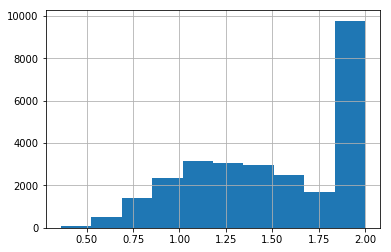

In [73]:
df['score'].hist()

In [74]:
df['jaccard2'] = df.apply(lambda x: jaccard_string(x['selected_text'], x['text']), axis=1)

In [96]:
df[df['score']<1]['jaccard'].mean()

0.3742146246094094

In [97]:
df[(df['score']<1)&(df['pred_word_count']==1)]['jaccard'].mean()

0.371049841298203

In [99]:
df[(df['score']<1)&(df['pred_word_count']==1)].sample(n=10)

,Unnamed: 0,textID,text,selected_text,sentiment,kfold,old_sentiment,aux_id,senti_label,words,pred,score,jaccard,jaccard2,pred_word_count
5021,16013,1d1e901b39,Looking for a show to turn my brain into mush ...,doesn`t hurt anymore,positive,2,neutral,1d1e901b39,2,"['Looking', 'for', 'a', 'show', 'to', 'turn', ...",good,0.806726,0.000000,0.130435,1
819,22803,c244549c82,haha i like modern studies..... its my favouri...,haha i like modern studies..... its my favouri...,positive,4,neutral,c244549c82,2,"['haha', 'i', 'like', 'modern', 'studies', '.'...",like,0.730661,0.066667,0.823529,1
1036,6532,0034cbc1c3,mmmm it all sounds tasty. i had some spiced ru...,mmmm it all sounds tasty. i had some spiced ru...,positive,1,worry,0034cbc1c3,2,"['mmmm', 'it', 'all', 'sounds', 'tasty', '.', ...",tasty.,0.946810,0.047619,1.000000,1
1063,1063,bc1e4ea01c,Ahhh! I knowww! I saw it May 5th and 6th in Ne...,"! I`m soo excited for 6th June, as its my bday...",positive,0,happiness,bc1e4ea01c,2,"['Ahhh', '!', 'I', 'knowww', '!', 'I', 'saw', ...",good!!!,0.573089,0.000000,0.440000,1
3355,25339,2889cb3b49,o can`t work that one out pain in the **** the...,o can`t work that one out pain in the **** the...,negative,4,hate,2889cb3b49,0,"['o', 'can', '`', 't', 'work', 'that', 'one', ...",pain,0.927107,0.083333,1.000000,1
1725,7221,d8ab6dfc33,doin fine relaxin at work... Hardly working,Hardly working,positive,1,neutral,d8ab6dfc33,2,"['doin', 'fine', 'relaxin', 'at', 'work', '.',...",fine,0.897155,0.000000,0.285714,1
1841,23825,5b50cd74d1,You`re welcome! It`s been a wonderful day How ...,wonderful,positive,4,happiness,5b50cd74d1,2,"['You', '`', 're', 'welcome', '!', 'It', '`', ...",wonderful,0.826697,1.000000,0.045455,1
4650,10146,bf8d6f642a,"It`s beautiful outside. The sun is shining, th...",It`s beautiful outside.,positive,1,worry,bf8d6f642a,2,"['It', '`', 's', 'beautiful', 'outside', '.', ...",beautiful,0.997112,0.333333,0.157895,1
3722,25706,b5c389e4cc,ohh and Coffee Break is my fave too! they rock...,they rock!,positive,4,surprise,b5c389e4cc,2,"['ohh', 'and', 'Coffee', 'Break', 'is', 'my', ...",fave,0.875274,0.000000,0.083333,1
1686,18174,5a45a070ed,Cathylo-fran! I`m glad i can vent out to you a...,Cathylo-fran! I`m glad i can vent out to you a...,positive,3,love,5a45a070ed,2,"['Cathylo', '-', 'fran', '!', 'I', '`', 'm', '...",glad,0.927156,0.058824,1.000000,1


In [94]:
df[(df['score']<0.8)&(df['pred_word_count']==1)]['jaccard2'].mean()

0.2674867996083293

In [83]:
df[df['score']<0.5]['jaccard'].mean()

0.29537895733219155

In [84]:
df[df['score']<0.5]['jaccard2'].mean()

0.31341913630592605

In [85]:
df['jaccard'].mean()

0.7162659696115115

In [86]:
df.groupby('sentiment')['jaccard'].mean()

sentiment
negative    0.541878
neutral     0.976445
positive    0.537346
Name: jaccard, dtype: float64

In [87]:
df[df['score']<0.5].shape

(39, 14)

In [88]:
df[df['jaccard']<0.2].shape

(3934, 14)

In [90]:
df[df['score']<0.8].sample(n=10)

,Unnamed: 0,textID,text,selected_text,sentiment,kfold,old_sentiment,aux_id,senti_label,words,pred,score,jaccard,jaccard2
2047,13039,86c7e297b2,Another loser: ****. I have lost the game more...,Another loser: ****.,negative,2,worry,86c7e297b2,0,"['Another', 'loser', ':', '****', '.', 'I', 'h...",Another loser: ****.,0.576418,1.000000,0.142857
1810,23794,b61b7c4098,"oh ok good ... now i will jump for joy! M, you...",r joy!,positive,4,happiness,b61b7c4098,2,"['oh', 'ok', 'good', '.', '.', '.', 'now', 'i'...",good,0.743420,0.000000,0.058824
4756,4756,17aeaef146,"Going to be buckling down this week. So, relie...",Enjoy,positive,0,relief,17aeaef146,2,"['Going', 'to', 'be', 'buckling', 'down', 'thi...",Enjoy my silence.,0.765416,0.333333,0.058824
2695,2695,de2ae9b43e,"Hi Lisa, you have the most BEAUTIFUL pups! HAP...","Hi Lisa, you have the most BEAUTIFUL pups! HAP...",positive,0,love,de2ae9b43e,2,"['Hi', 'Lisa', ',', 'you', 'have', 'the', 'mos...",BEAUTIFUL,0.713443,0.058824,1.000000
4300,4300,e587eeba94,hahaha tempting! but nvm la. i`m quite a klutz...,i actually fare better,positive,0,fun,e587eeba94,2,"['hahaha', 'tempting', '!', 'but', 'nvm', 'la'...",hahaha tempting! but nvm la. i`m quite a klutz...,0.682747,0.307692,0.222222
3863,9359,0a2bce3efa,_Craig_G Hope your enjoying the money..it`s lo...,enjoying,positive,1,happiness,0a2bce3efa,2,"['_Craig_G', 'Hope', 'your', 'enjoying', 'the'...",Hope your enjoying the money..it`s looking rea...,0.644287,0.125000,0.076923
41,5443,5c83af1147,Gourmet pizza = BLEH. Pizza is SUPPOSED to be ...,filthy.,negative,1,worry,5c83af1147,0,"['Gourmet', 'pizza', '=', 'BLEH', '.', 'Pizza'...",BLEH. Pizza is SUPPOSED to be greasy and filthy.,0.781541,0.111111,0.050000
3934,3934,ba33e6afea,"So, what`s so great bout your so called `wonde...",wonderful,positive,0,anger,ba33e6afea,2,"['So', ',', 'what', '`', 's', 'so', 'great', '...",great,0.759594,0.000000,0.000000
3245,3245,a0216fc825,i get migranes.. so .. that leaves you to eith...,i get migranes,negative,0,sadness,a0216fc825,0,"['i', 'get', 'migranes', '.', '.', 'so', '.', ...",i get migranes..,0.750292,0.500000,0.142857
1818,23802,80a43d94a8,Hey JK...Wish Evenlyn a Happy Mothers Day tomo...,Happy,positive,4,love,80a43d94a8,2,"['Hey', 'JK', '.', '.', '.', 'Wish', 'Evenlyn'...",Happy Mothers Day tomora for me..I had a Great...,0.679296,0.100000,0.041667


In [38]:
# df[df['jaccard']>0.8].sample(n=20)

In [39]:
# df[df['jaccard']<0.2].sample(n=20)

In [22]:
df['all_sentence'].mean()

0.1486891156878323

In [23]:
df.groupby('all_sentence')['jaccard'].mean()

all_sentence
0    0.539671
1    0.483044
Name: jaccard, dtype: float64